In [1]:
import numpy as np
import pandas as pd

## series
Series是一个一维标记数组，能够保存任何数据类型（整数、字符串、浮点数、Python对象等）。轴标签统称为索引。创建系列的基本方法是
>>> s = pd.Series(data, index=index)
在这里，数据可以是许多不同的东西：
•Python字典
•n维数组
•标量值（如5）
传递的索引是轴标签的列表。因此，根据数据的不同，这可分为几种情况：

来自ndarray：

In [2]:
s = pd.Series(np.random.randn(5),index=['A','B','C','D','E'])
s

A   -2.378815
B   -0.279717
C   -0.322022
D    0.553597
E    0.007367
dtype: float64

In [3]:
s.index

Index(['A', 'B', 'C', 'D', 'E'], dtype='object')

In [4]:
s.values
#注意：pandas支持非唯一索引值。如果试图执行不支持重复索引值的操作，则此时将引发异常。懒惰的原因几乎都是基于性能的（在计算中有很多实例，比如GroupBy的某些部分，没有使用索引）。


array([-2.37881516, -0.279717  , -0.32202191,  0.55359672,  0.00736683])

数据来自字典：

In [6]:
dic = {
    'A':1,
    'B':2,
    'C':3,
    'D':4,
    'E':5
}
S1 =pd.Series(dic)
S1

A    1
B    2
C    3
D    4
E    5
dtype: int64

数据来自标量

In [7]:
pd.Series(5,index=['A','B','C','D','E'])

A    5
B    5
C    5
D    5
E    5
dtype: int64

In [8]:
np.exp(S1)

A      2.718282
B      7.389056
C     20.085537
D     54.598150
E    148.413159
dtype: float64

## 相关的方法如下
### 与数组相关
>s.dtype  查看数据类型

>s.array  如果需要用数组来返回一个系列，请使用Serie.array

>s.to_numpy()

### 与字典相关
>s["a"]

>"e" in s

>s.get("f")
### 矢量化操作和与系列的标签对齐
在使用原始NumPy数组时，通常不需要逐值循环。在pandas序列中也是如此。序列也可以传递到大多数NumPy方法中，这些方法需要一个ndarray。
>s + s

>s * 2

>np.exp(s)

Series和ndarray之间的一个关键区别是，Series之间的操作会根据标签自动对齐数据。因此，您可以编写计算，而不考虑所涉及的序列是否具有相同的标签。
注意：一般来说，我们选择使不同索引对象之间的默认操作结果产生索引的并集，以避免信息丢失。虽然缺少数据，但拥有索引标签通常是计算中的重要信息。当然，您可以通过dropna函数删除缺少数据的标签。
### 分配名字
s = pd.Series(np.random.randn(5), name="something")
>s.name

>s2 = s.rename("different")

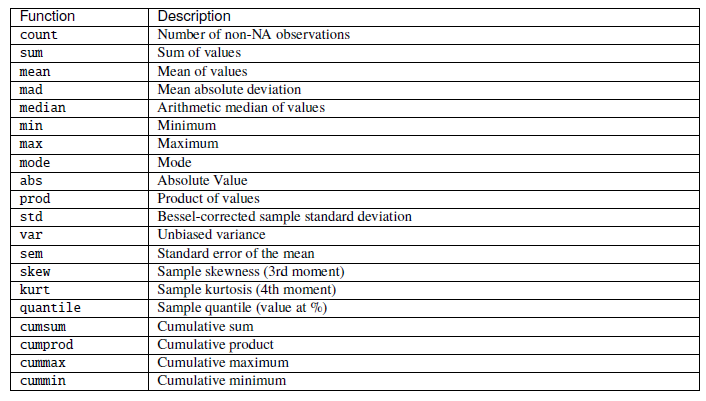

In [12]:
s = pd.Series(np.random.randn(5), name="something")
s

0    1.107100
1   -0.361583
2   -0.323612
3    0.239933
4    1.238596
Name: something, dtype: float64

In [13]:
s.name

'something'

## 2.2.2 DataFrame
DataFrame是一种二维标记数据结构，包含可能不同类型的列。你可以把它想象成一个电子表格或SQL表，或者一系列对象的dict。它通常是最常用的对象。与Series一样，DataFrame接受多种不同类型的输入：
• Dict of 1D ndarrays, lists, dicts, or Series
• 2-D numpy.ndarray
• Structured or record ndarray
• A Series
• Another DataFrame
除了数据，还可以选择传递索引（行标签）和列（列标签）参数。如果传递一个索引和/或列，则保证生成的数据帧的索引和/或列。因此，一个系列的dict加上一个特定的索引将丢弃所有与传递的索引不匹配的数据。
### From dict of Series or dicts


In [14]:
d = {
     "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
     "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
 }

df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [15]:
pd.DataFrame(d, index=["d", "b", "a"])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [16]:
pd.DataFrame(d, index=["d", "b", "a"], columns=["two", "three"])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


In [17]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [18]:
df.columns

Index(['one', 'two'], dtype='object')

### From dict of ndarrays / lists

In [19]:
d = {"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


### From structured or record array

In [28]:
data = np.zeros((2,), dtype=[("A", "i4"), ("B", "f4"), ("C", "a10")])
data[:] = [(1, 2.0, "Hello"), (2, 3.0, "World")]
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [29]:
pd.DataFrame(data, columns=["C", "A", "B"])

,C,A,B
0,b'Hello',1,2.0
1,b'World',2,3.0


In [30]:
pd.DataFrame(data, index=["first", "second"])

,A,B,C
first,1,2.0,b'Hello'
second,2,3.0,b'World'


### From a list of dicts

In [31]:
data2 = [{"a": 1, "b": 2}, {"a": 5, "b": 10, "c": 20}]
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


### From a dict of tuples

In [32]:
pd.DataFrame(
         {
             ("a", "b"): {("A", "B"): 1, ("A", "C"): 2},
             ("a", "a"): {("A", "C"): 3, ("A", "B"): 4},
             ("a", "c"): {("A", "B"): 5, ("A", "C"): 6},
             ("b", "a"): {("A", "C"): 7, ("A", "B"): 8},
             ("b", "b"): {("A", "D"): 9, ("A", "B"): 10},
         }
     )


a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

In [1]:
import numpy as np
import pandas as pd

### From a list of namedtuples
列表中第一个名字的元组的字段名决定了数据帧的列。剩下的命名元组（或元组）被简单地解包，它们的值被输入到数据帧的行中。如果其中任何一个元组比第一个命名的元组短，则相应行中后面的列将标记为缺少值。如果任何长度超过第一个命名的整数，则会引发ValueError。

from collections import namedtuple  
Point = namedtuple("Point", "x y")
pd.DataFrame([Point(0, 0), Point(0, 3), (2, 3)])

In [13]:
Point3D = namedtuple("Point3D", "x y z m")
pd.DataFrame([Point3D(0, 0, 0,0), Point(0, 3), Point(2, 3)])

,x,y,z,m
0,0,0,0.0,0.0
1,0,3,NaN,NaN
2,2,3,NaN,NaN


### From a list of dataclasses

In [16]:
from dataclasses import make_dataclass
Point = make_dataclass("Point", [("x", int), ("y", float)])
df = pd.DataFrame([Point(0, 0), Point(0, 3), Point(2, 3)])

In [22]:
df['x'].dtype
#关于这个话题，我们将在缺失数据一节中进行更多讨论。为了构造一个缺少数据的数据帧，我们使用np。nan表示缺少的值。或者，你也可以通过一个numpy。MaskedArray作为DataFrame构造函数的数据参数，其屏蔽项将被视为丢失。

dtype('int64')

### 替代构造函数
#### DataFrame.from_dict
DataFrame.from_dict获取一个dict或一个类似数组的序列，并返回一个DataFrame。它的操作与DataFrame构造函数类似，除了orient参数（默认情况下为“columns”），但它可以设置为“index”，以便将dict键用作行标签。

In [23]:
pd.DataFrame.from_dict(dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]))

,A,B
0,1,4
1,2,5
2,3,6


In [27]:
pd.DataFrame.from_dict(
     dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]),
     orient="index",
     columns=["one", "two", "three"],
     )

,one,two,three
A,1,2,3
B,4,5,6


#### DataFrame.from_records
DataFrame.from_records获取元组列表或具有结构化数据类型的数据数组。它的工作原理与普通的DataFrame构造函数类似，只是生成的数据帧索引可能是结构化数据类型的特定字段。例如：

In [33]:
data

array([(1, 2., b'Hello'), (2, 3., b'World')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [34]:
pd.DataFrame.from_records(data, index="C")

,A,B
C,,
b'Hello',1,2.0
b'World',2,3.0


## Column selection, addition, deletion
您可以在语义上将数据帧视为类似索引序列对象的dict。使用与类似dict操作相同的语法获取、设置和删除columnsworks：

In [52]:
df = pd.DataFrame(np.random.randn(5,4),index=['a','b','c','d','e'],columns=['one','two','three','four'])
df

df["one"]

a   -2.257444
b    0.259155
c    0.858474
d    0.113161
e   -1.166567
Name: one, dtype: float64

In [53]:
df

,one,two,three,four
a,-2.257444,-0.824371,0.618483,-1.673750
b,0.259155,0.216053,0.214565,-0.886829
c,0.858474,0.565841,-1.098464,0.696282
d,0.113161,0.576148,1.835363,0.232508
e,-1.166567,-0.179696,-2.114957,0.472721


In [54]:
df["five"] = df["one"] * df["two"]
df["flag"] = df["one"] < -2
df

,one,two,three,four,five,flag
a,-2.257444,-0.824371,0.618483,-1.673750,1.860972,True
b,0.259155,0.216053,0.214565,-0.886829,0.055991,False
c,0.858474,0.565841,-1.098464,0.696282,0.485760,False
d,0.113161,0.576148,1.835363,0.232508,0.065197,False
e,-1.166567,-0.179696,-2.114957,0.472721,0.209627,False


列可以像使用dict一样删除或弹出：

In [55]:
del df["two"]
three = df.pop('five')
df

,one,three,four,flag
a,-2.257444,0.618483,-1.673750,True
b,0.259155,0.214565,-0.886829,False
c,0.858474,-1.098464,0.696282,False
d,0.113161,1.835363,0.232508,False
e,-1.166567,-2.114957,0.472721,False


In [57]:
df['three']

a    0.618483
b    0.214565
c   -1.098464
d    1.835363
e   -2.114957
Name: three, dtype: float64

插入标量值时，它会自然传播以填充列：

In [58]:
df["foo"] = "bar"
df

,one,three,four,flag,foo
a,-2.257444,0.618483,-1.673750,True,bar
b,0.259155,0.214565,-0.886829,False,bar
c,0.858474,-1.098464,0.696282,False,bar
d,0.113161,1.835363,0.232508,False,bar
e,-1.166567,-2.114957,0.472721,False,bar


插入与数据帧索引不同的序列时，它将符合数据帧的索引：

In [60]:
df["six"] = df["one"][:3]
df

,one,three,four,flag,foo,six
a,-2.257444,0.618483,-1.673750,True,bar,-2.257444
b,0.259155,0.214565,-0.886829,False,bar,0.259155
c,0.858474,-1.098464,0.696282,False,bar,0.858474
d,0.113161,1.835363,0.232508,False,bar,NaN
e,-1.166567,-2.114957,0.472721,False,bar,NaN


您可以插入原始Ndarray，但它们的长度必须与数据帧索引的长度匹配。
默认情况下，将在末尾插入列。插入功能可用于在列中的特定位置插入：

In [61]:
df.insert(1,"bar",df["one"])
df

,one,bar,three,four,flag,foo,six
a,-2.257444,-2.257444,0.618483,-1.673750,True,bar,-2.257444
b,0.259155,0.259155,0.214565,-0.886829,False,bar,0.259155
c,0.858474,0.858474,-1.098464,0.696282,False,bar,0.858474
d,0.113161,0.113161,1.835363,0.232508,False,bar,NaN
e,-1.166567,-1.166567,-2.114957,0.472721,False,bar,NaN


### 在方法链中指定新列
受dplyr的mutate verb的启发，DataFrame有一个assign（）方法，允许您轻松创建可能从现有列派生的新列。

In [78]:
iris = pd.read_csv(r"C:\Users\59972\Desktop\data\MI\MNFCTRIMSA.csv")
data1 = pd.read_csv(r"C:\Users\59972\Desktop\data\MI\MNFCTRIRNSA.CSV")
data2 = pd.read_csv(r"C:\Users\59972\Desktop\data\MI\MNFCTRIRSA.CSV")
data3 = pd.read_json(r"C:\Users\59972\Desktop\data\MI\manufacturers-inventories_metadata.json")
data4 = pd.read_json(r"C:\Users\59972\Desktop\data\MI\manufacturers-inventories-to-sales-ratio_metadata.json")

In [63]:
iris.head()

,realtime_start,realtime_end,date,value
0,2019-12-06,2019-12-06,1992-01-01,377883
1,2019-12-06,2019-12-06,1992-02-01,376757
2,2019-12-06,2019-12-06,1992-03-01,377688
3,2019-12-06,2019-12-06,1992-04-01,377491
4,2019-12-06,2019-12-06,1992-05-01,377450


In [64]:
iris.describe()

,value
count,333.000000
mean,512094.525526
std,97618.269138
min,376070.000000
25%,427462.000000
50%,480748.000000
75%,622220.000000
max,697876.000000


In [66]:
data1.describe()

,value
count,333.000000
mean,1.343574
std,0.120554
min,1.090000
25%,1.260000
50%,1.330000
75%,1.410000
max,1.790000


In [67]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   realtime_start  333 non-null    object 
 1   realtime_end    333 non-null    object 
 2   date            333 non-null    object 
 3   value           333 non-null    float64
dtypes: float64(1), object(3)
memory usage: 10.5+ KB


In [71]:
data2.head()

,realtime_start,realtime_end,date,value
0,2019-12-06,2019-12-06,1992-01-01,1.66
1,2019-12-06,2019-12-06,1992-02-01,1.65
2,2019-12-06,2019-12-06,1992-03-01,1.58
3,2019-12-06,2019-12-06,1992-04-01,1.57
4,2019-12-06,2019-12-06,1992-05-01,1.55


In [75]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   realtime_start  1 non-null      object
 1   realtime_end    1 non-null      object
 2   seriess         1 non-null      object
dtypes: object(3)
memory usage: 152.0+ bytes


In [76]:
data4.head()

,realtime_start,realtime_end,seriess
0,2019-12-06,2019-12-06,"{'id': 'MNFCTRIRNSA', 'realtime_start': '2019-..."


In [79]:
data3.head()

,realtime_start,realtime_end,seriess
0,2019-12-06,2019-12-06,"{'id': 'MNFCTRIMSA', 'realtime_start': '2019-1..."


In [80]:
print(data3)

  realtime_start realtime_end  \
0     2019-12-06   2019-12-06   

                                             seriess  
0  {'id': 'MNFCTRIMSA', 'realtime_start': '2019-1...  


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

sale = pd.read_csv(r"C:\Users\59972\Desktop\data\inventory\sale.csv")

In [3]:
sale.head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99


In [4]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198917 entries, 0 to 198916
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order             198917 non-null  int64  
 1   File_Type         198917 non-null  object 
 2   SKU_number        198917 non-null  int64  
 3   SoldFlag          75996 non-null   float64
 4   SoldCount         75996 non-null   float64
 5   MarketingType     198917 non-null  object 
 6   ReleaseNumber     198917 non-null  int64  
 7   New_Release_Flag  198917 non-null  int64  
 8   StrengthFactor    198917 non-null  float64
 9   PriceReg          198917 non-null  float64
 10  ReleaseYear       198917 non-null  int64  
 11  ItemCount         198917 non-null  int64  
 12  LowUserPrice      198917 non-null  float64
 13  LowNetPrice       198917 non-null  float64
dtypes: float64(6), int64(6), object(2)
memory usage: 21.2+ MB


In [5]:
sale.isnull().sum()

Order                    0
File_Type                0
SKU_number               0
SoldFlag            122921
SoldCount           122921
MarketingType            0
ReleaseNumber            0
New_Release_Flag         0
StrengthFactor           0
PriceReg                 0
ReleaseYear              0
ItemCount                0
LowUserPrice             0
LowNetPrice              0
dtype: int64

## Assigning new columns in method chains
受dplyr的mutate verb的启发，DataFrame有一个assign（）方法，允许您轻松创建可能从现有列派生的新列。

In [6]:
sale.assign(item_mean=sale["SKU_number"]/sale["ItemCount"]).head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,item_mean
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84,217140.875000
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54,83486.230769
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97,18020.617647
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15,5794.150000
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99,30854.964286


在上面的例子中，我们插入了一个预计算的值。我们还可以传入一个参数的函数，该参数将在指定给的数据帧上进行计算。
assign always returns a copy of the data, leaving the original DataFrame untouched.

In [7]:
sale.assign(item_mean=lambda x:(x["SKU_number"]/x["ItemCount"])).head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,item_mean
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84,217140.875000
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54,83486.230769
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97,18020.617647
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15,5794.150000
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99,30854.964286


当您手头没有对数据帧的引用时，传递可调用的值（而不是要插入的实际值）非常有用。这在一系列操作中使用assign时很常见。例如，我们可以将数据框限制为萼片长度大于5的观察值，计算比率，然后绘制：

由于传入了一个函数，因此该函数是在分配给它的数据帧上计算的。重要的是，这是被过滤到萼片长度大于5的行的数据帧。首先进行过滤，然后进行比率计算。在这个例子中，我们没有对过滤后的数据帧的引用。

assign的函数签名就是**kwargs。键是新字段的列名，值要么是要插入的值（例如，一个系列或NumPy数组），要么是要在数据帧上调用的一个参数的函数。返回原始数据帧的副本，并插入新值。

从Python3.6开始，**kwargs的顺序保持不变。这允许依赖赋值，其中**kwargs中后面的表达式可以引用同一assign（）中先前创建的列。

<AxesSubplot:xlabel='lowuser', ylabel='PriceReg'>

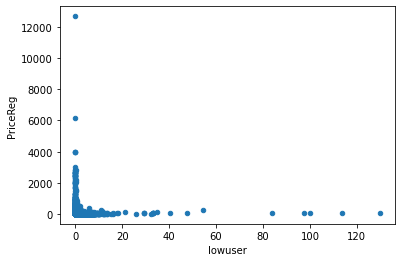

In [11]:
(
sale.query("PriceReg>20").assign(
    lowuser=lambda x:x["LowUserPrice"]/x["PriceReg"],
    lownet=lambda x:x["LowNetPrice"]/x["PriceReg"]
    ).plot(kind="scatter",x="lowuser",y="PriceReg")
)

In [12]:
dfa = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
dfa.assign(C=lambda x: x["A"] + x["B"], D=lambda x: x["A"] + x["C"])

,A,B,C,D
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12


### Indexing / selection
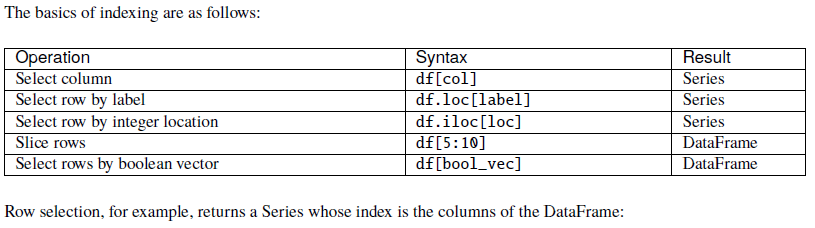

## Data alignment and arithmetic
DataFrame对象之间的数据对齐在列和索引（行标签）上自动对齐。
同样，结果对象将具有列和行标签的并集。

In [13]:
df = pd.DataFrame(np.random.randn(10, 4), columns=["A", "B", "C", "D"])
df2 = pd.DataFrame(np.random.randn(7, 3), columns=["A", "B", "C"])
df + df2

,A,B,C,D
0,-1.156311,0.316442,0.418256,NaN
1,-0.192423,1.136216,-0.112114,NaN
2,0.487883,-0.449743,-0.077061,NaN
3,-1.194849,1.096311,0.340757,NaN
4,0.714319,-0.488438,2.184742,NaN
5,1.504303,-2.078711,2.189168,NaN
6,0.271431,-1.134997,-0.434125,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


在DataFrame和Series之间执行操作时，默认行为是对齐DataFrame列上的Series索引，从而按行广播。例如：

In [14]:
df - df.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,0.458654,-1.476433,-1.104256,-0.467236
2,-0.051285,-2.466067,-0.060623,-2.207253
3,-0.544592,-0.613488,-1.414119,-3.018135
4,0.885403,-2.374956,1.278775,-0.824899
5,1.140493,-2.818045,0.030691,-1.074598
6,1.762083,-1.760939,-0.105395,-0.704878
7,2.325477,-0.172833,2.029586,-1.882221
8,0.612382,-1.245698,-0.792576,-0.157841
9,0.511421,-1.218094,-1.529356,-1.527060


In [15]:
df * 5 + 2

,A,B,C,D
0,1.285272,5.209651,4.646163,10.157669
1,3.578544,-2.172516,-0.875117,7.821488
2,1.028849,-7.120683,4.343047,-0.878595
3,-1.437689,2.142210,-2.424431,-4.933007
4,5.712290,-6.665128,11.040040,6.033174
5,6.987738,-8.880575,4.799620,4.784681
6,10.095686,-3.595042,4.119186,6.633282
7,12.912657,4.345484,14.794092,0.746566
8,4.347183,-1.018840,0.683284,9.368465
9,3.842379,-0.880820,-3.000615,2.522371


In [16]:
1 / df

,A,B,C,D
0,-6.995672,1.557802,1.889528,0.612920
1,3.167476,-1.198318,-1.739059,0.858887
2,-5.148528,-0.548205,2.133974,-1.736958
3,-1.454466,35.159250,-1.130089,-0.721188
4,1.346878,-0.577026,0.553095,1.239718
5,1.002458,-0.459535,1.785957,1.795538
6,0.617613,-0.893648,2.359396,1.079149
7,0.458184,2.131757,0.390805,-3.989040
8,2.130214,-1.656265,-3.797327,0.678567
9,2.713882,-1.735617,-0.999877,9.571734


In [17]:
df ** 4

,A,B,C,D
0,0.000418,1.698053e-01,0.078449,7.085726
1,0.009935,4.849668e-01,0.109331,1.837621
2,0.001423,1.107209e+01,0.048222,0.109861
3,0.223453,6.543974e-07,0.613126,3.696634
4,0.303870,9.020276e+00,10.685662,0.423358
5,0.990226,2.242474e+01,0.098292,0.096210
6,6.872813,1.567955e+00,0.032270,0.737352
7,22.690396,4.842276e-02,42.870427,0.003949
8,0.048563,1.328864e-01,0.004809,4.716591
9,0.018435,1.102007e-01,1.000492,0.000119


In [18]:
df1 = pd.DataFrame({"a": [1, 0, 1], "b": [0, 1, 1]}, dtype=bool)
df1

,a,b
0,True,False
1,False,True
2,True,True


In [19]:
df2 = pd.DataFrame({"a": [0, 1, 1], "b": [1, 1, 0]}, dtype=bool)
df1 & df2
#df1 | df2
#df1 ^ df2

,a,b
0,False,False
1,False,True
2,True,False


In [20]:
-df1

,a,b
0,False,True
1,True,False
2,False,False


In [21]:
df[:5].T

,0,1,2,3,4
A,-0.142946,0.315709,-0.194230,-0.687538,0.742458
B,0.641930,-0.834503,-1.824137,0.028442,-1.733026
C,0.529233,-0.575023,0.468609,-0.884886,1.808008
D,1.631534,1.164298,-0.575719,-1.386601,0.806635


## 数据帧与NumPy函数的互操作性
元素级NumPy UFUNC（日志、exp、sqrt等）如果序列和数据帧中的数据是数字的，则可以使用各种其他NumPy函数，而不会出现任何问题：

DataFrame无意成为ndarray的替代品，因为它的索引语义和数据模型在某些地方与n维数组截然不同。
该系列实现了_array _ufunc __，这使它能够与NumPy的通用函数一起工作。
ufunc以一系列方式应用于底层数组。

In [22]:
np.exp(df)

,A,B,C,D
0,0.866801,1.900145,1.697629,5.111709
1,1.371231,0.434090,0.562692,3.203672
2,0.823468,0.161357,1.597771,0.562300
3,0.502813,1.028850,0.412761,0.249923
4,2.101094,0.176749,6.098288,2.240356
5,2.711624,0.113482,1.750539,1.745317
6,5.048732,0.326603,1.527813,2.526049
7,8.868729,1.598550,12.920540,0.778266
8,1.599093,0.546748,0.768478,4.365327
9,1.445530,0.562050,0.367834,1.110127


In [23]:
np.asarray(df)

array([[-0.14294553,  0.6419302 ,  0.52923261,  1.63153387],
       [ 0.31570875, -0.83450318, -0.57502346,  1.16429754],
       [-0.19423028, -1.82413664,  0.46860933, -0.5757191 ],
       [-0.68753773,  0.02844202, -0.88488615, -1.38660135],
       [ 0.74245797, -1.73302553,  1.80800805,  0.80663485],
       [ 0.99754758, -2.17611497,  0.55992398,  0.55693615],
       [ 1.61913711, -1.11900847,  0.42383728,  0.9266563 ],
       [ 2.18253149,  0.46909672,  2.55881833, -0.25068689],
       [ 0.46943651, -0.60376806, -0.26334315,  1.47369308],
       [ 0.36847585, -0.57616397, -1.00012296,  0.10447428]])

与库的其他部分一样，pandas将自动将标记的输入作为ufunc的一部分与多个输入对齐。例如，使用numpy.remainder()两个序列上具有不同顺序标签的余数（）将在操作之前对齐。

In [24]:
ser1 = pd.Series([1, 2, 3], index=["a", "b", "c"])
ser2 = pd.Series([1, 3, 5], index=["b", "a", "c"])
np.remainder(ser1, ser2)

a    1
b    0
c    3
dtype: int64

In [25]:
#通常，两个索引的并集被采用，不重叠的值被缺失的值填充。
ser3 = pd.Series([2, 4, 6], index=["b", "c", "d"])
np.remainder(ser1, ser3)

a    NaN
b    0.0
c    3.0
d    NaN
dtype: float64

In [26]:
#当二进制ufunc应用于序列和索引时，序列实现优先，并返回序列。
ser = pd.Series([1, 2, 3])
idx = pd.Index([4, 5, 6])
np.maximum(ser, idx)

0    4
1    5
2    6
dtype: int64

## 控制台显示器
非常大的数据帧将被截断以在控制台中显示。您还可以使用info（）获取摘要。
（这里我正在阅读plyr R软件包中棒球数据集的CSV版本）：

In [27]:
review = pd.read_csv(r"E:\数据\review\Reviews.csv")

In [28]:
print(review)

            Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568449  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        HelpfulnessNumerator  HelpfulnessDenominato

In [29]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [30]:
#但是，使用to_string将以表格形式返回数据帧的字符串表示形式，尽管它并不总是适合控制台宽度：
print(review.iloc[-20:,:6].to_string())

            Id   ProductId          UserId                 ProfileName  HelpfulnessNumerator  HelpfulnessDenominator
568434  568435  B003XUL27E   ABGQPE97ZVYJ3             Katherine Kelly                     0                       0
568435  568436  B003XUL27E  A2PSB4WQHH46HN                    carlyowu                     0                       2
568436  568437  B000NY4SAG  A3ODWHC3EMMWTT    K. Brennan "Baking fool"                    10                      10
568437  568438  B000NY4SAG  A1RKKPSXF9QIZF            Allen "RcDriver"                     4                       4
568438  568439  B000NY4SAG  A3M89SF0SSOGBK      Robert Goode "GrampaG"                     3                       3
568439  568440  B000NY4SAG  A34GDV49ZZQKXG              Donald M. Cook                     0                       5
568440  568441  B005ZC0RRO  A2TO5R8QLIITEF                         SAK                     1                       1
568441  568442  B000NY8O9M   AZRHU8CP5XKMF              David L.